## Data Preprocessing and Analysis

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [105]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
stock = pd.read_csv('E:\\Coding\\MachineLearning\\CSVFile\\VNI.csv')

In [108]:
stock.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2021,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
1,12/30/2021,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2,12/29/2021,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
3,12/28/2021,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
4,12/27/2021,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%


In [109]:
stock

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2021,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
1,12/30/2021,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2,12/29/2021,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
3,12/28/2021,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
4,12/27/2021,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%
...,...,...,...,...,...,...,...
125,07/07/2021,"1,388.55","1,354.79","1,388.55","1,334.58",733.80K,2.49%
126,07/06/2021,"1,354.79","1,411.13","1,418.99","1,354.79",773.51K,-3.99%
127,07/05/2021,"1,411.13","1,420.27","1,421.52","1,394.12",774.45K,-0.64%
128,07/02/2021,"1,420.27","1,422.89","1,424.28","1,415.82",706.83K,0.23%


In [110]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      130 non-null    object
 1   Price     130 non-null    object
 2   Open      130 non-null    object
 3   High      130 non-null    object
 4   Low       130 non-null    object
 5   Vol.      130 non-null    object
 6   Change %  130 non-null    object
dtypes: object(7)
memory usage: 7.2+ KB


In [111]:
stock.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,130,130,130,130,130,130,130
unique,130,130,130,127,129,126,106
top,12/31/2021,"1,498.28","1,485.97","1,374.85","1,384.77",1.01M,-0.01%
freq,1,1,1,2,2,3,4


In [112]:
stock.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [113]:
stock.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [114]:
stock["Change %"] = stock["Change %"].str.replace('%', '').astype(float)
stock["Price"] = stock["Price"].str.replace(',', '').astype(float)
stock["Open"] = stock["Open"].str.replace(',', '').astype(float)
stock["High"] = stock["High"].str.replace(',', '').astype(float)
stock["Low"] = stock["Low"].str.replace(',', '').astype(float)
stock["Vol."] = stock["Vol."].str.replace('K', '0')
stock["Vol."] = stock["Vol."].str.replace('M', '0000')
stock["Vol."] = stock["Vol."].str.replace('.', '').astype(float)

C:\Users\PC\AppData\Local\Temp\ipykernel_3168\1259262454.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock["Vol."] = stock["Vol."].str.replace('.', '').astype(float)


In [115]:
stock.reset_index(drop=True, inplace=True)
stock.fillna(stock.mean(), inplace=True) #Filling null columns with mean values....
stock.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_3168\3641491736.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stock.fillna(stock.mean(), inplace=True) #Filling null columns with mean values....


,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2021,1498.28,1485.97,1499.07,1485.97,875730.0,0.83
1,12/30/2021,1485.97,1490.96,1493.38,1484.82,747860.0,0.01
2,12/29/2021,1485.82,1494.39,1498.91,1485.82,843880.0,-0.57
3,12/28/2021,1494.39,1488.88,1499.77,1483.97,1000000.0,0.37
4,12/27/2021,1488.88,1477.03,1490.12,1469.91,752110.0,0.80


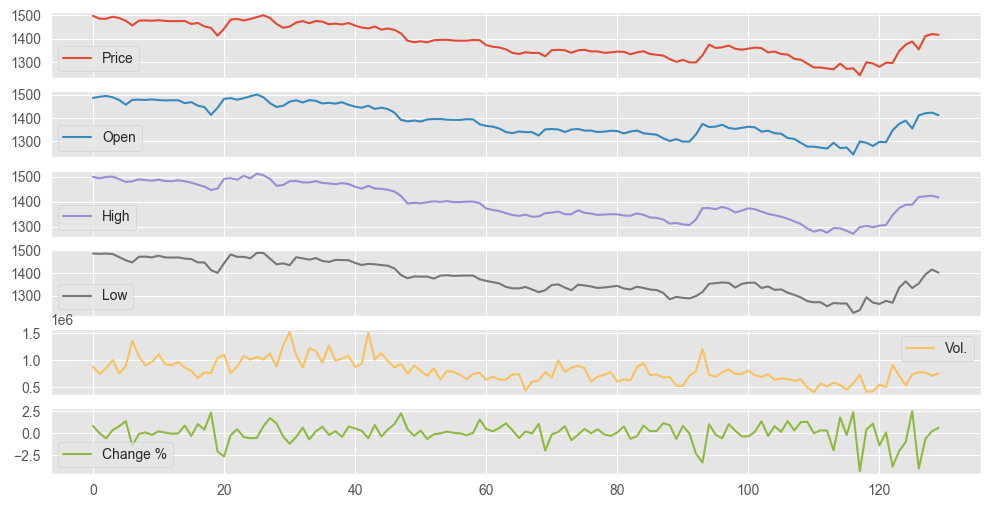

In [116]:
stock.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

In [117]:
stock.shape

(130, 7)

In [118]:
stock.size

910

In [119]:
stock.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,130,130,12/31/2021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,130.0,NaN,NaN,NaN,1388.673615,68.784144,1243.51,1339.58,1374.765,1460.365,1500.81
Open,130.0,NaN,NaN,NaN,1388.095308,68.211673,1243.51,1339.58,1374.765,1456.8475,1500.81
High,130.0,NaN,NaN,NaN,1398.110154,68.079643,1273.29,1347.5425,1388.55,1470.415,1511.68
Low,130.0,NaN,NaN,NaN,1378.071538,69.682036,1225.52,1329.4675,1362.245,1446.8525,1488.87
Vol.,130.0,NaN,NaN,NaN,806180.615385,213189.161304,406890.0,667370.0,766480.0,923840.0,1520000.0
Change %,130.0,NaN,NaN,NaN,0.054154,1.126075,-4.29,-0.3375,0.16,0.7575,2.49


In [120]:
stock.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [121]:
stock.sort_index(axis=1,ascending=True)

,Change %,Date,High,Low,Open,Price,Vol.
0,0.83,12/31/2021,1499.07,1485.97,1485.97,1498.28,875730.0
1,0.01,12/30/2021,1493.38,1484.82,1490.96,1485.97,747860.0
2,-0.57,12/29/2021,1498.91,1485.82,1494.39,1485.82,843880.0
3,0.37,12/28/2021,1499.77,1483.97,1488.88,1494.39,1000000.0
4,0.80,12/27/2021,1490.12,1469.91,1477.03,1488.88,752110.0
...,...,...,...,...,...,...,...
125,2.49,07/07/2021,1388.55,1334.58,1354.79,1388.55,733800.0
126,-3.99,07/06/2021,1418.99,1354.79,1411.13,1354.79,773510.0
127,-0.64,07/05/2021,1421.52,1394.12,1420.27,1411.13,774450.0
128,0.23,07/02/2021,1424.28,1415.82,1422.89,1420.27,706830.0


In [122]:
stock.nunique()

Date        130
Price       130
Open        130
High        127
Low         129
Vol.        126
Change %    106
dtype: int64

### Visualize the data

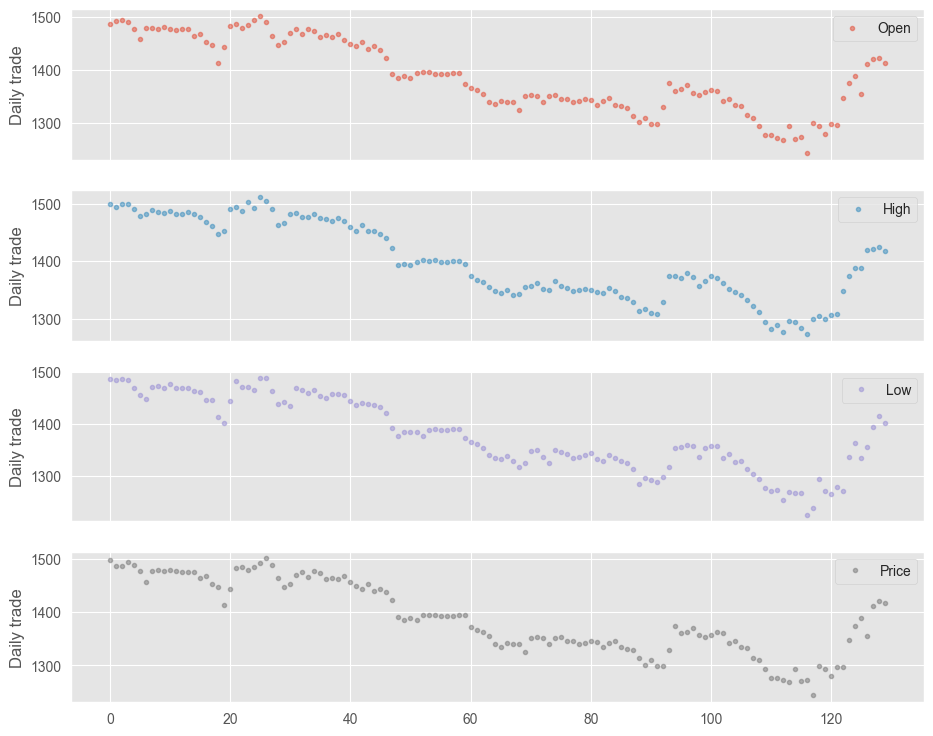

In [123]:
cols_plot = ['Open', 'High', 'Low','Price']
axes = stock[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

C:\Users\PC\AppData\Local\Temp\ipykernel_3168\2072816488.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock['Price'], ax = ax[0,1])
C:\Users\PC\AppData\Local\Temp\ipykernel_3168\2072816488.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock['Open'], ax = ax[1,1])
C:\Users\PC\AppDa

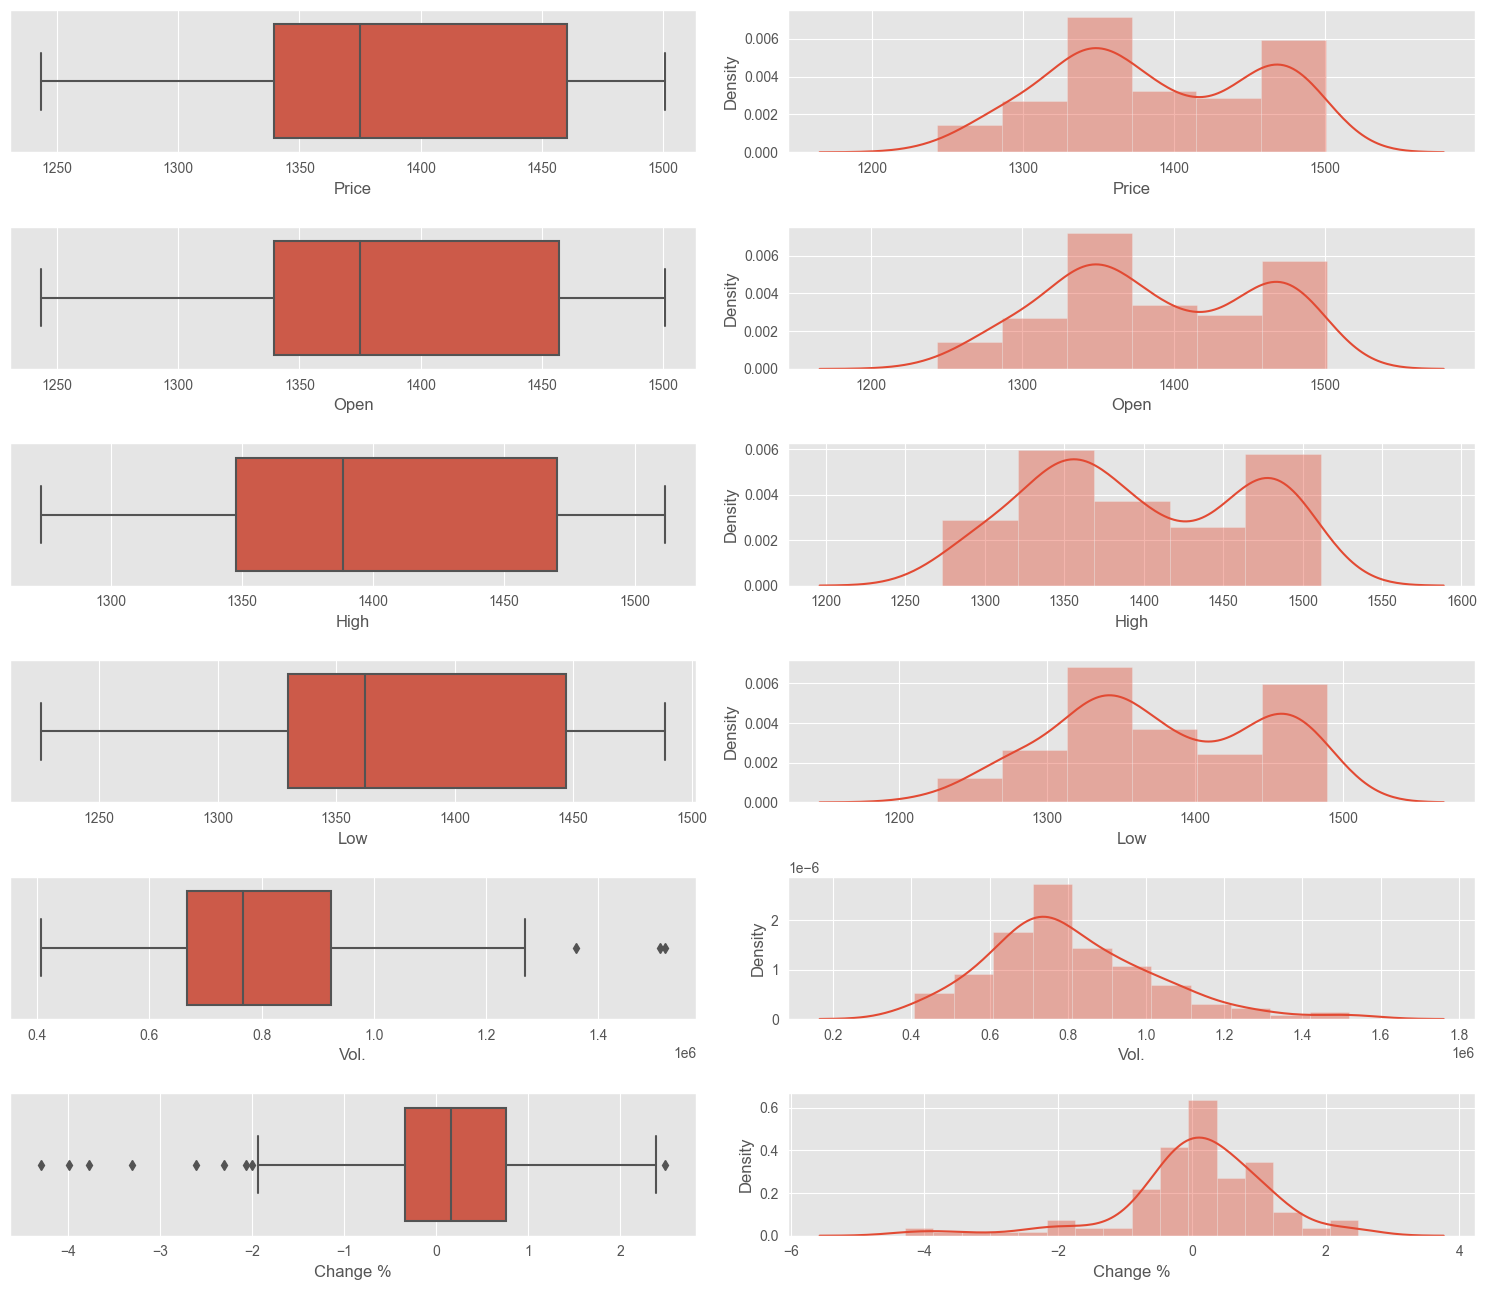

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= stock["Price"], ax = ax[0,0])
sns.distplot(stock['Price'], ax = ax[0,1])
sns.boxplot(x= stock["Open"], ax = ax[1,0])
sns.distplot(stock['Open'], ax = ax[1,1])
sns.boxplot(x= stock["High"], ax = ax[2,0])
sns.distplot(stock['High'], ax = ax[2,1])
sns.boxplot(x= stock["Low"], ax = ax[3,0])
sns.distplot(stock['Low'], ax = ax[3,1])
sns.boxplot(x= stock["Vol."], ax = ax[4,0])
sns.distplot(stock['Vol.'], ax = ax[4,1])
sns.boxplot(x= stock["Change %"], ax = ax[5,0])
sns.distplot(stock['Change %'], ax = ax[5,1])
plt.tight_layout()

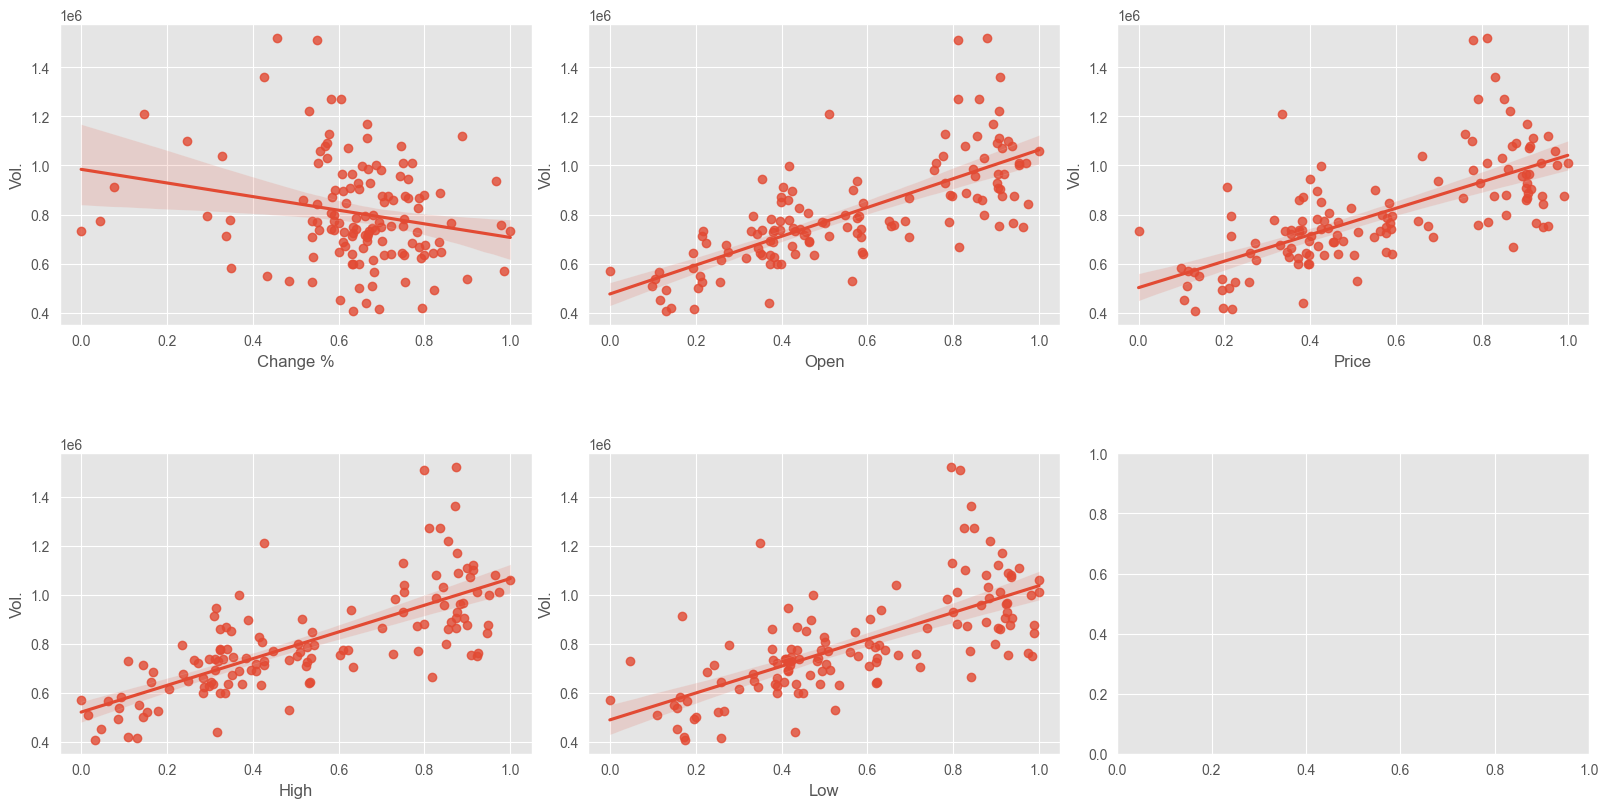

In [125]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Change %', 'Open', 'Price', 'High', 'Low']
x = stock.loc[:,column_sels]
y = stock['Vol.']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [126]:
x = stock["Date"]

In [127]:
y = stock["Price"]

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [129]:
x

0      12/31/2021
1      12/30/2021
2      12/29/2021
3      12/28/2021
4      12/27/2021
          ...    
125    07/07/2021
126    07/06/2021
127    07/05/2021
128    07/02/2021
129    07/01/2021
Name: Date, Length: 130, dtype: object

In [130]:
y

0      1498.28
1      1485.97
2      1485.82
3      1494.39
4      1488.88
        ...   
125    1388.55
126    1354.79
127    1411.13
128    1420.27
129    1417.08
Name: Price, Length: 130, dtype: float64

Stock must be converted into data of shape [100,1] to make it easier for CNN to train on

In [131]:
X = []
Y = []
window_size=100
for i in range(1 , len(stock) - window_size -1 , 1):
    first = stock.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((stock.iloc[i + j, 2] - first) / first)
    temp2.append((stock.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [132]:
first 

1447.25

In [133]:
temp

[0.0,
 0.003523924684746871,
 0.015602003800310885,
 0.019761616859561175,
 0.013266539989635546,
 0.020259112109172524,
 0.018048022110899908,
 0.010433580929348702,
 0.012278459146657442,
 0.00984626014855761,
 0.014040421489030877,
 0.006398341682501289,
 0.000753152530661543,
 -0.0020383485921575714,
 0.003599930903437579,
 -0.0057211953705302975,
 -0.0020590775608913584,
 -0.006384522370012098,
 -0.01674209708067025,
 -0.03843150803247531,
 -0.042736223872862265,
 -0.04008291587493522,
 -0.043171532216272256,
 -0.03693211262739682,
 -0.035874935221972756,
 -0.035736742097080686,
 -0.03769217481430296,
 -0.03827949559509421,
 -0.03823803765762648,
 -0.03624114700293664,
 -0.03673173259630339,
 -0.05149075833477283,
 -0.05614786664363447,
 -0.0583382276731733,
 -0.06399723613750208,
 -0.07442390741060635,
 -0.07763689756434611,
 -0.0726826740369667,
 -0.07465192606667816,
 -0.0745828295042322,
 -0.08447745724650198,
 -0.06638797719813434,
 -0.06528934185524271,
 -0.06672655035411984

In [134]:
temp2

[-0.01683192261184999]

In [135]:
X

[array([[ 0.        ],
        [ 0.00230053],
        [-0.00139507],
        [-0.00934297],
        [-0.0228041 ],
        [-0.00891372],
        [-0.00819606],
        [-0.00914176],
        [-0.00749182],
        [-0.00962467],
        [-0.01036916],
        [-0.01002039],
        [-0.00989295],
        [-0.01839084],
        [-0.01541289],
        [-0.0255473 ],
        [-0.02963862],
        [-0.05189945],
        [-0.03195257],
        [-0.00597602],
        [-0.00386999],
        [-0.00839727],
        [-0.00410474],
        [ 0.00138837],
        [ 0.00660648],
        [-0.00140178],
        [-0.01833047],
        [-0.02931668],
        [-0.02589607],
        [-0.01417208],
        [-0.01013441],
        [-0.01643907],
        [-0.0096515 ],
        [-0.01179777],
        [-0.01918898],
        [-0.01739819],
        [-0.01975908],
        [-0.01568788],
        [-0.02310592],
        [-0.02858561],
        [-0.03129527],
        [-0.02582229],
        [-0.03487015],
        [-0

In [136]:
Y

[array([[-0.08792992]]),
 array([[-0.10234276]]),
 array([[-0.09626699]]),
 array([[-0.09633521]]),
 array([[-0.08546563]]),
 array([[-0.11061333]]),
 array([[-0.11407685]]),
 array([[-0.12436626]]),
 array([[-0.13699241]]),
 array([[-0.13522867]]),
 array([[-0.13743816]]),
 array([[-0.14037073]]),
 array([[-0.12365449]]),
 array([[-0.13170122]]),
 array([[-0.13262442]]),
 array([[-0.14410099]]),
 array([[-0.1019236]]),
 array([[-0.08465032]]),
 array([[-0.11321814]]),
 array([[-0.12449647]]),
 array([[-0.12718238]]),
 array([[-0.08880983]]),
 array([[-0.07418981]]),
 array([[-0.0699785]]),
 array([[-0.09729413]]),
 array([[-0.0522141]]),
 array([[-0.02962497]]),
 array([[-0.01683192]])]

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

22
6


In [138]:
train_X

array([[[[ 0.        ],
         [-0.01029306],
         [-0.01444843],
         ...,
         [-0.13566261],
         [-0.1187414 ],
         [-0.13432744]]],


       [[[ 0.        ],
         [-0.02294076],
         [-0.00238462],
         ...,
         [-0.12163647],
         [-0.11990849],
         [-0.14049227]]],


       [[[ 0.        ],
         [-0.00454487],
         [-0.00023566],
         ...,
         [-0.12878487],
         [-0.13821801],
         [-0.12634747]]],


       ...,


       [[[ 0.        ],
         [-0.00214895],
         [-0.00289906],
         ...,
         [-0.1118875 ],
         [-0.11470546],
         [-0.12582191]]],


       [[[ 0.        ],
         [-0.00368712],
         [-0.01161678],
         ...,
         [-0.09140853],
         [-0.08830359],
         [-0.09002335]]],


       [[[ 0.        ],
         [ 0.00230053],
         [-0.00139507],
         ...,
         [-0.09249745],
         [-0.08931829],
         [-0.0862062 ]]]])

## Training part

### This part has 2 subparts: CNN and LSTM

- For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. 

- In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. 

- In between, MaxPooling layers are added.

- After that, it's passed to Bi-LSTM layers

In [139]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

In [140]:
# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

In [141]:
# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, 
                    validation_data=(test_X,test_Y), 
                    epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
1/1 [==============================] - 8s 8s/step - loss: 0.0116 - mse: 0.0116 - mae: 0.1021 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0951
Epoch 2/40
1/1 [==============================] - 0s 48ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0930 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0841
Epoch 3/40
1/1 [==============================] - 0s 38ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0832 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0692
Epoch 4/40
1/1 [==============================] - 0s 39ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0699 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0480
Epoch 5/40
1/1 [==============================] - 0s 39ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0529 - val_loss: 8.2564e-04 - val_mse: 8.2564e-04 - val_mae: 0.0235
Epoch 6/40
1/1 [==============================] - 0s 41ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0343 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0258
Epoch 7/40
1/1 [============

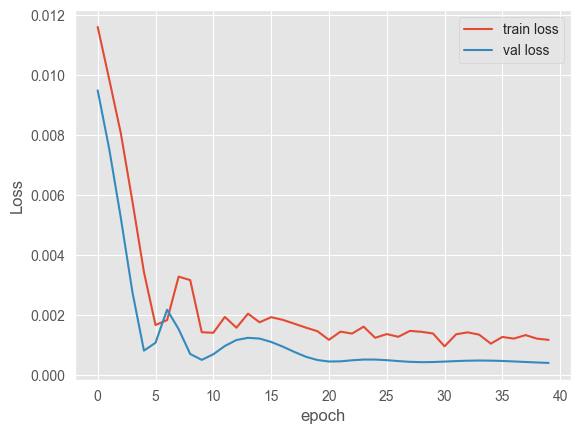

In [142]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

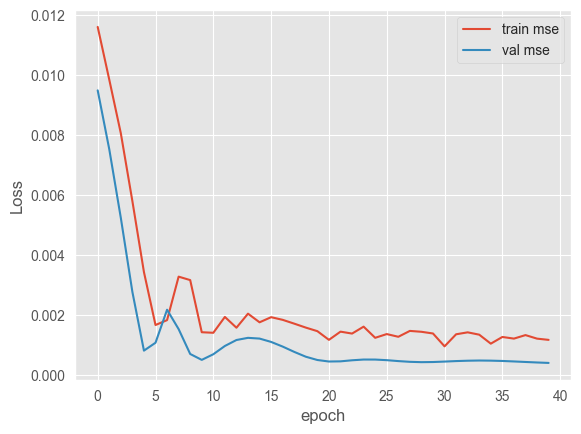

In [143]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

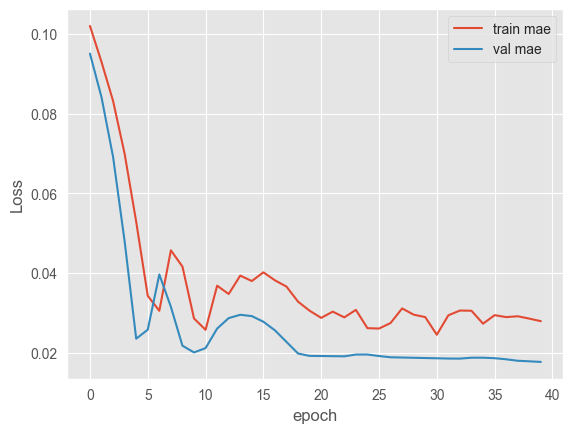

In [144]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [156]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [145]:
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 23ms/step - loss: 4.1612e-04 - mse: 4.1612e-04 - mae: 0.0177


[0.00041612342465668917, 0.00041612342465668917, 0.017685584723949432]

In [146]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.086583
R2 Score: 0.086583
Max Error: 0.031430


1/1 [==============================] - 0s 29ms/step


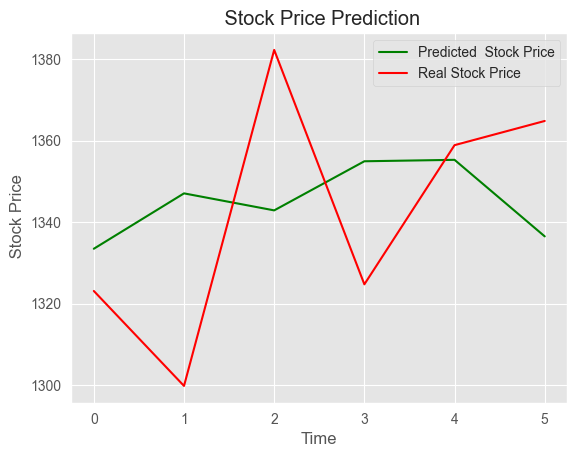

In [147]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = stock.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

## Testing part

In this part, the model is saved and loaded back again. 

Then, it's made to train again but with different data to check it's loss and prediction

In [148]:
# First we need to save a model
model.save("model.h5")

In [149]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [150]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 21, 64)       

In [164]:
# For data preprocessing and analysis part
#data2 = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/aaoi.us.txt')
#data2 = pd.read_csv('../input/nifty50-stock-market-data/SBIN.csv')
#data2 = pd.read_csv('../input/stock-market-data/stock_market_data/nasdaq/csv/ACTG.csv')
stock2 = pd.read_csv('E:\Coding\MachineLearning\CSVFile\VNItest.csv')
# Any CSV or TXT file can be added here....
stock2.dropna(inplace=True)
stock2.head()



,Date,Price,Open,High,Low,Vol.,Change %
0,10/31/2022,"1,027.94","1,028.24","1,030.32","1,005.00",662.04K,0.06%
1,10/28/2022,"1,027.36","1,028.01","1,044.57","1,026.53",654.70K,-0.06%
2,10/27/2022,"1,028.01",993.36,"1,028.01",990.48,647.72K,3.49%
3,10/26/2022,993.36,997.70,"1,004.55",984.71,448.28K,-0.44%
4,10/25/2022,997.70,986.15,"1,011.39",962.45,751.18K,1.17%


In [165]:
stock2["Change %"] = stock2["Change %"].str.replace('%', '').astype(float)
stock2["Price"] = stock2["Price"].str.replace(',', '').astype(float)
stock2["Open"] = stock2["Open"].str.replace(',', '').astype(float)
stock2["High"] = stock2["High"].str.replace(',', '').astype(float)
stock2["Low"] = stock2["Low"].str.replace(',', '').astype(float)
stock2["Vol."] = stock2["Vol."].str.replace('K', '0')
stock2["Vol."] = stock2["Vol."].str.replace('M', '0000')
stock2["Vol."] = stock2["Vol."].str.replace('.', '').astype(float)

C:\Users\PC\AppData\Local\Temp\ipykernel_3168\1249690281.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock2["Vol."] = stock2["Vol."].str.replace('.', '').astype(float)


In [166]:
stock2.reset_index(drop=True, inplace=True)
stock2.fillna(stock2.mean(), inplace=True)
stock2.head()
stk = stock2.drop('Date', axis=1)

print(stk)

      Price     Open     High      Low      Vol.  Change %
0   1027.94  1028.24  1030.32  1005.00  662040.0      0.06
1   1027.36  1028.01  1044.57  1026.53  654700.0     -0.06
2   1028.01   993.36  1028.01   990.48  647720.0      3.49
3    993.36   997.70  1004.55   984.71  448280.0     -0.44
4    997.70   986.15  1011.39   962.45  751180.0      1.17
..      ...      ...      ...      ...       ...       ...
59  1252.74  1250.25  1253.75  1245.05  698640.0     -0.11
60  1254.15  1249.76  1257.38  1247.38  724750.0      0.35
61  1249.76  1241.62  1250.20  1232.41  789520.0      0.66
62  1241.62  1231.35  1241.91  1224.11  817690.0      0.83
63  1231.35  1206.33  1231.35  1206.33  708710.0      2.07

[64 rows x 6 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_3168\717239240.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stock2.fillna(stock2.mean(), inplace=True)


In [167]:
X = []
Y = []
window_size=100
for i in range(1 , len(stk) - window_size -1 , 1):
    first = stk.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((stk.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((stk.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [168]:
X

[]

In [169]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [157]:
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 26ms/step - loss: 1802808.6250 - mse: 1802808.6250 - mae: 1342.3854


[1802808.625, 1802808.625, 1342.3853759765625]

In [158]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = stock2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U8')) -> None